In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

plt.style.use('ggplot')
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv('Weather.csv')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(119040, 31)

In [8]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


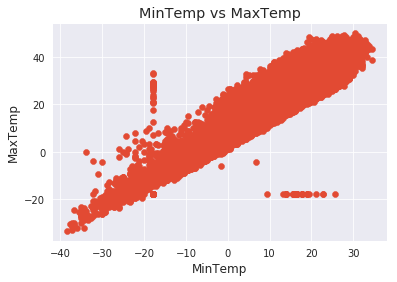

In [9]:
plt.scatter(x = 'MinTemp', y = 'MaxTemp', data = df);
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [10]:
#Reshape the X and Y variable 
X = df['MinTemp'].values.reshape(-1, 1)
y = df['MaxTemp'].values.reshape(-1, 1)

In [11]:
feature = df[['MinTemp']].columns
feature

Index(['MinTemp'], dtype='object')

<h3> Model Selection using cross val score and cross val predict </h3> 

In [12]:
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
print(X_train.shape, y_train.shape)

(95232, 1) (95232, 1)


In [15]:
print(X_test.shape, y_test.shape)

(23808, 1) (23808, 1)


In [16]:
scorer = make_scorer(r2_score)

<H3> Here, we are going to test if lasso, Ridge or ElasticNet would perform best </h3> 

In [17]:
#instantiate the estimators first
lasso = Lasso()
ridge = Ridge()
elasticnet = ElasticNet()
stochastic_gradient = SGDRegressor()

In [18]:
def estimators(estimators):
    for estimator in estimators: 

        score = np.mean(cross_val_score(estimator, X_train, y_train, scoring = scorer, cv = 5))
        print('the ' + str(estimator) + ' score is: ', score)
        print(' ')

models = [lasso, ridge, elasticnet, stochastic_gradient]
estimators(models)

the Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) score is:  0.7711534022367579
 
the Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) score is:  0.77134123258339
 
the ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) score is:  0.7711708546866051
 


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, defau

the SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False) score is:  0.7600153115138522
 


<h3> From the above, all estimator seem to perform almost the same except the Ridge regressio which outperform all the other estimators by 0.0002 </h3>

</h3> Also, We would want to plot the estimators performance on a scatter diagram </h3> 

Title: Graph of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


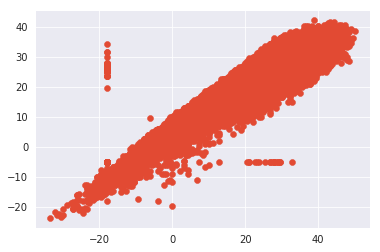

(95232,) (95232, 1)
 
Title: Graph of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


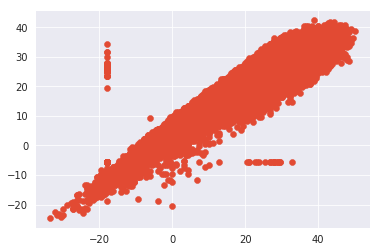

(95232, 1) (95232, 1)
 
Title: Graph of ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


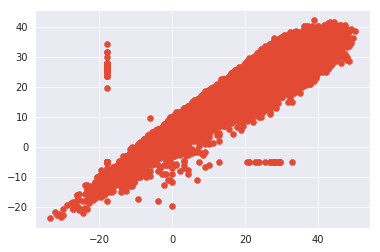

(95232,) (95232, 1)
 


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, defau

Title: Graph of SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)


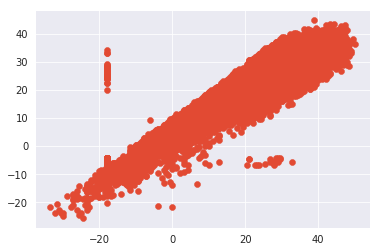

(95232,) (95232, 1)
 


In [19]:
def estimators(estimators):
    for estimator in estimators: 

        predict = cross_val_predict(estimator, X_train, y_train, cv = 5)
        print('Title: Graph of ' + str(estimator))
        plt.scatter(x = y_train, y = predict)
        plt.show();
        print(predict.shape, y_train.shape)
        print(' ')

models = [lasso, ridge, elasticnet, stochastic_gradient]
estimators(models)

<h3> given that all the accuracies are all very must the same, the give very similar graphical representation of their accuracies </h3> 

<h3> in order to build the model, I will have to use Ridge regression with no further transformation given that the dependent and independent variable are linearly related</h3> 

In [20]:
#Time for model tuning 

In [21]:
ridge = Ridge(random_state = 42)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [23]:
steps = [('scaler', StandardScaler()), ('imputer', SimpleImputer()), ('ridge', ridge)]

In [24]:
pipeline = Pipeline(steps)

In [25]:
#Tune The hyperparameters of the estimator (Ridge regression) 

In [29]:
params = {'ridge__alpha': np.linspace(0.01, 20, num = 50)}

In [32]:
gridsearch = GridSearchCV(pipeline, param_grid= params, scoring = scorer, cv = 6, n_jobs = -1, return_train_score= True)

In [33]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'ridge__alpha': array([1.00000e-02, 4.17959e-01, 8.25918e-01, 1.23388e+00, 1.64184e+00,
       2.04980e+00, 2.45776e+00, 2.86571e+00, 3.27367e+00, 3.68163e+00,
       4.08959e+00, 4.49755e+00, 4.90551e+00, 5.31347e+00, 5.72143e+00,
       6.12939e+00, 6.53735e+00, 6.94531e+00, 7.35327e+0... 1.75522e+01, 1.79602e+01,
       1.83682e+01, 1.87761e+01, 1.91841e+01, 1.95920e+01, 2.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(r2_score), verbose=

In [41]:
gridsearch.best_params_

{'ridge__alpha': 6.12938775510204}

In [42]:
gridsearch.best_score_

0.7712980640096689

<h3> Here, we find the intercept and coefficients of the linear model </h3> 

In [43]:
#NB: How to determine the coefficients when using pipeline 
gridsearch.best_estimator_.steps[2][1].coef_.flatten()


array([7.66723007])

In [44]:
#below is the coefficient
print(list(zip(feature, gridsearch.best_estimator_.steps[2][1].coef_.flatten())))

[('MinTemp', 7.6672300748644515)]


In [45]:
#NB: How to determine the intercept when using pipeline 
gridsearch.best_estimator_.steps[2][1].intercept_

array([27.02093017])

In [46]:
y_pred = gridsearch.predict(X_test)

<H4> Below, we check for overfitting i.e. if the mean train score is overly higher than the mean test score, then there is overfitting in the training phase</h4>

In [47]:
grid_result = pd.DataFrame(gridsearch.cv_results_)

In [50]:
grid_result[['mean_train_score','std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.771398,0.000937,0.771298,0.004613
1,0.771398,0.000937,0.771298,0.004613
2,0.771398,0.000937,0.771298,0.004613
3,0.771398,0.000937,0.771298,0.004613
4,0.771398,0.000937,0.771298,0.004613


In [55]:
print('mean train score is ', str(np.mean(grid_result['mean_train_score'])),  'mean test score is ', str(np.mean(grid_result['mean_test_score'])))

mean train score is  0.7713980142465185 mean test score is  0.7712980578574932


<H4> From the above there is no overfitting in the training phase </h4>

In [32]:
df_pred = pd.DataFrame({
    'Actual_values': y_test.flatten(),
    'predicted_values': y_pred.flatten(),
    'difference': y_test.flatten() - y_pred.flatten()
})

In [33]:
df_pred.head()

,Actual_values,predicted_values,difference
0,30.000000,27.534645,2.465355
1,28.888889,30.086953,-1.198064
2,28.333333,30.086953,-1.753620
3,33.333333,35.191569,-1.858236
4,38.888889,35.702031,3.186858


In [41]:
#time to see the correlation between the actual and predicted values 
df_pred[['Actual_values', 'predicted_values']].corr()

,Actual_values,predicted_values
Actual_values,1.000000,0.878743
predicted_values,0.878743,1.000000


<H3> From the above, the correlation coefficients between the actual and predicted values is 0.88 </h3> 

In [34]:
#check out the shape
df_pred.shape

(23808, 3)

<H4> Evaluate the performance of the model </h4>

In [35]:
print('The r-squared of the Ridge regressio is ', r2_score(y_test, y_pred))
print('the Mean-squared Error of the ridge regression is ', mean_squared_error(y_test, y_pred))
print('the Root Mean-squared Error of the ridge regression is ', np.sqrt(mean_squared_error(y_test, y_pred)))

The r-squared of the Ridge regressio is  0.7721547160968689
the Mean-squared Error of the ridge regression is  17.115306364729193
the Root Mean-squared Error of the ridge regression is  4.137064945674553


<H4> Graphical model evaluation using scatter diagram and Histogram </h4> 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


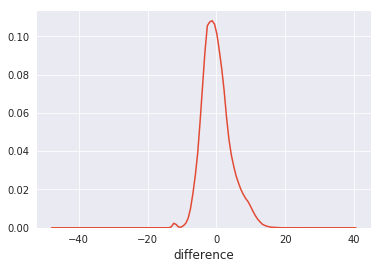

In [36]:
#Plot 1 - plot of the residue
sns.distplot(df_pred['difference'], hist = False);

<h4> Based on the above plot, the model is acceptable as the residual are distributed around the zero point </h4>

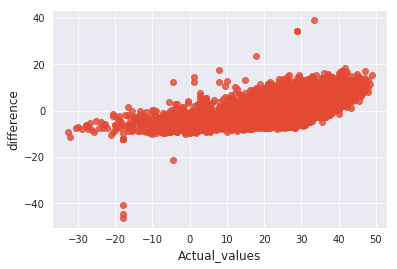

In [37]:
#plot 2 - plot of the actual values vs redisdue 

sns.regplot(x = 'Actual_values', y= 'difference', data = df_pred, fit_reg = False);

#from the graph below, majority of the actual values have their residue around zero which means the prediction is a very acceptable one
#nonetheless, there are very little outliers which can be either neglected or further investigated 

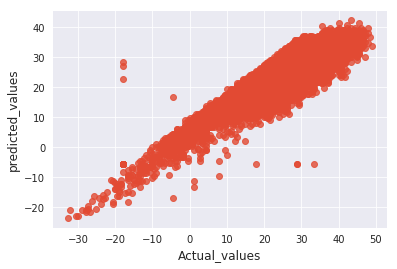

In [38]:
#plot 3  - plot of the actual vs predicted values on a scatter plot 

sns.regplot(x = 'Actual_values', y = 'predicted_values', data = df_pred, fit_reg = False);

<h4> From the above scatter plot, the predicted value and the actual value are highly correlated which means that the predicted values are very much similar to the actual values and thus the model is acceptable </h4>